Machine Learning Weather Prediction – Forecasting the Future

Weather prediction, often known as weather forecasting, is the act of predicting the state of the atmosphere at a specific time and location in the future. It is a critical field of research for comprehending and forecasting the behaviour of our planet’s atmosphere, which is constantly changing owing to natural and man-made forces. Accurate weather prediction has several uses, including agriculture, transportation, aviation, and disaster management.

Tools and Libraries Used
The project makes use of the following Python libraries:
· NumPy
· Pandas
· Matplotlib
· Seaborn
· Scikit-Learn
· Plotly

In the first step, the necessary machine learning libraries will be imported.

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In the next step, the dataset is read using the read_csv() function and the first five rows of the dataset can be displayed.

In [59]:
#Load the dataset
data = pd.read_csv("weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [61]:
#Check for null values
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [62]:
#convert the data type into datetime
data['date'] = pd.to_datetime(data['date'])

In [63]:
print(data['date'])

0      2012-01-01
1      2012-01-02
2      2012-01-03
3      2012-01-04
4      2012-01-05
          ...    
1456   2015-12-27
1457   2015-12-28
1458   2015-12-29
1459   2015-12-30
1460   2015-12-31
Name: date, Length: 1461, dtype: datetime64[ns]


 data visualisation technique

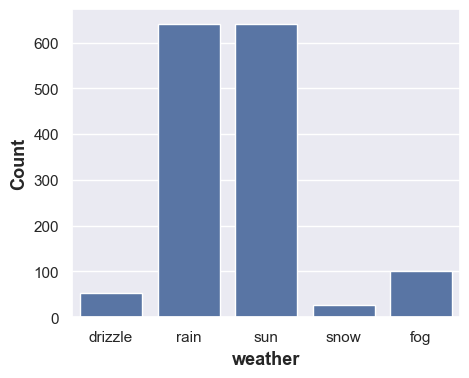

In [64]:
plt.figure(figsize=(5,4))
sns.set_theme()
sns.countplot(x = 'weather',data = data)
plt.xlabel("weather",fontweight='bold',size=13)
plt.ylabel("Count",fontweight='bold',size=13)
plt.show()

The line chart can be used to display the variation in maximum temperature on different dates.

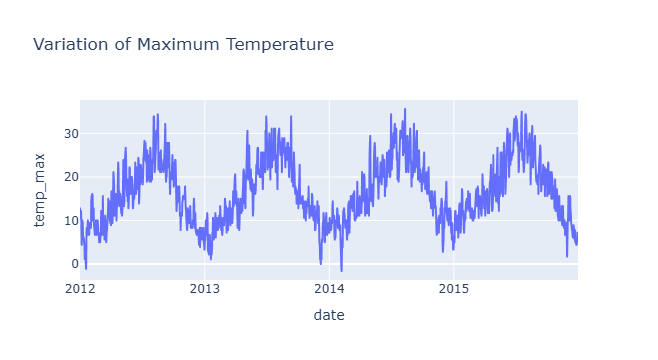

In [65]:
px.line(data_frame = data,
       x = 'date',
       y = 'temp_max', 
       title = 'Variation of Maximum Temperature')

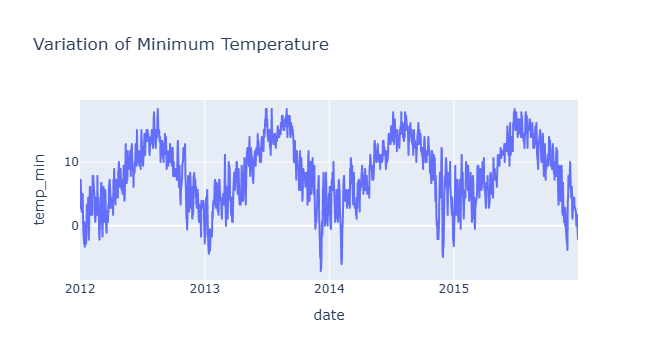

In [66]:
px.line(data_frame = data,
       x = 'date',
       y = 'temp_min', 
       title = 'Variation of Minimum Temperature')

Catplot is a shorthand for categorical plots, which can be implemented to analyse the relationship between variables.

C:\Users\niksh\AppData\Local\Temp\ipykernel_25928\3814060822.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1000x500 with 0 Axes>

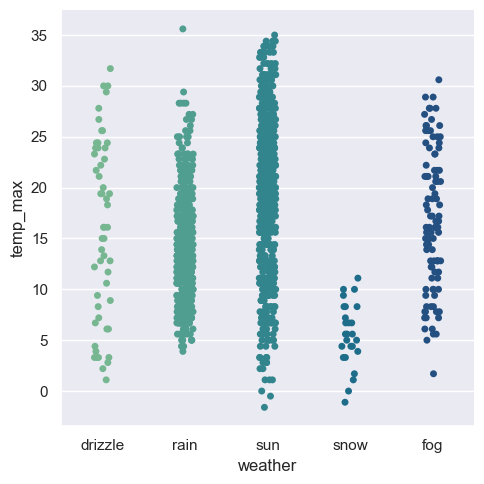

In [67]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_max',data=data,palette="crest")
plt.show()

<Figure size 1000x500 with 0 Axes>

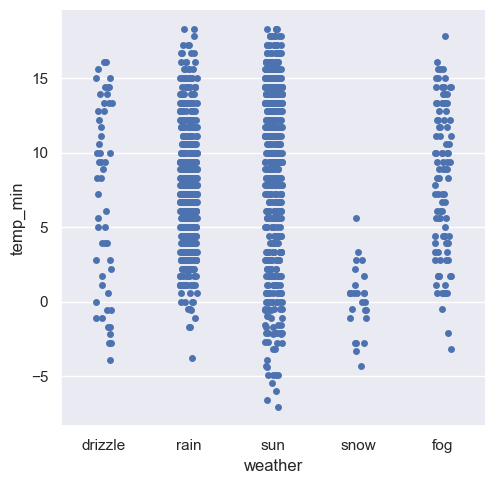

In [68]:
plt.figure(figsize=(10,5))
sns.catplot(x='weather',y ='temp_min',data=data)
plt.show()

Following data visualisation, the data can be pre-processed to convert the data into a form which can be better understood by Machine Learning models. We define a function called LABEL_ENCODING which can be used to convert categorical values into numerical values where in each categorical value is assigned with a unique integer value. We use this concept to convert the values in the weather column into integer values.

In [69]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    label_encoder = preprocessing.LabelEncoder()
    data[c1]= label_encoder.fit_transform(data[c1])
    data[c1].unique()
LABEL_ENCODING("weather")

In [70]:
print(data)

           date  precipitation  temp_max  temp_min  wind  weather
0    2012-01-01            0.0      12.8       5.0   4.7        0
1    2012-01-02           10.9      10.6       2.8   4.5        2
2    2012-01-03            0.8      11.7       7.2   2.3        2
3    2012-01-04           20.3      12.2       5.6   4.7        2
4    2012-01-05            1.3       8.9       2.8   6.1        2
...         ...            ...       ...       ...   ...      ...
1456 2015-12-27            8.6       4.4       1.7   2.9        2
1457 2015-12-28            1.5       5.0       1.7   1.3        2
1458 2015-12-29            0.0       7.2       0.6   2.6        1
1459 2015-12-30            0.0       5.6      -1.0   3.4        4
1460 2015-12-31            0.0       5.6      -2.1   3.5        4

[1461 rows x 6 columns]


In [71]:
data = data.drop('date',axis=1)

In [72]:
print(data)

      precipitation  temp_max  temp_min  wind  weather
0               0.0      12.8       5.0   4.7        0
1              10.9      10.6       2.8   4.5        2
2               0.8      11.7       7.2   2.3        2
3              20.3      12.2       5.6   4.7        2
4               1.3       8.9       2.8   6.1        2
...             ...       ...       ...   ...      ...
1456            8.6       4.4       1.7   2.9        2
1457            1.5       5.0       1.7   1.3        2
1458            0.0       7.2       0.6   2.6        1
1459            0.0       5.6      -1.0   3.4        4
1460            0.0       5.6      -2.1   3.5        4

[1461 rows x 5 columns]


In [73]:
x = data.drop('weather',axis=1)
y = data['weather']

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

Before we go ahead and start training Machine Learning models using the training data, we will make use of StandardScaler, which is an in-built sklearn preprocessing technique. It is a common method used in machine learning to normalise numerical data before feeding it into models that require standardisation.

In [75]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

The first model which will be trained on the dataset would be Logistic Regression.



In [76]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

Predictions from the Logistic Regression model can be made using the predict() function.

In [77]:

y_pred = classifier.predict(X_test)

The performance of models can be evaluated using metrics like confusion matrix, accuracy score 

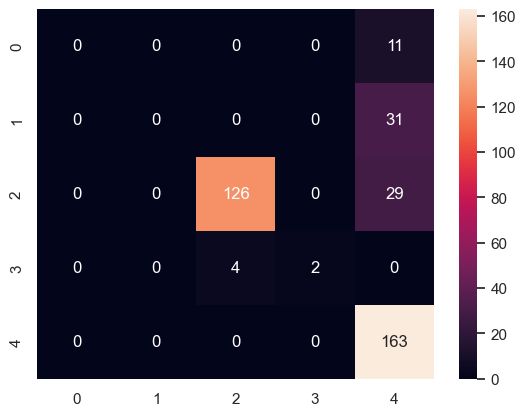

In [83]:
sns.heatmap(cm,annot=True, fmt = '.3g')
plt.show()
#from sklearn.metrics import accuracy_score
#acc1 = accuracy_score(y_test, y_pred)
#print(f"accuracy_score: {acc1}")


The next algorithm which will be used is the Naive Bayes Classifier.

In [79]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

The predictions are made in a way similar to how it was made earlier.

Accuracy score : 0.8415300546448088


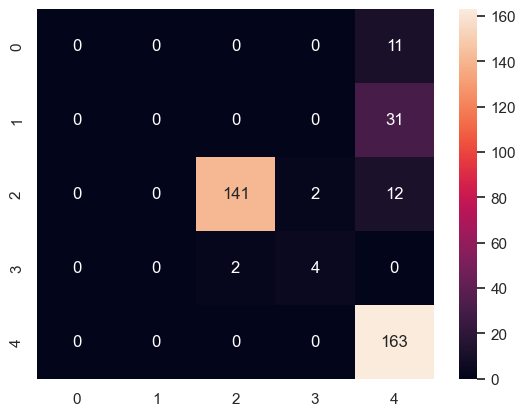

In [80]:
from sklearn.metrics import confusion_matrix
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '.3g')
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy score : {acc}")

The last model which will be trained on the dataset would be the Support Vector Classifier.

In [81]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

The confusion matrix and accuracy score can be displayed like earlier.

0.7950819672131147


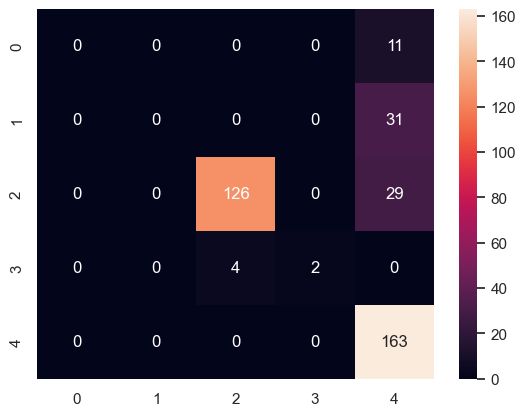

In [82]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True, fmt = '0.3g')
print(accuracy_score(y_test, y_pred))



In conclusion, the project demonstrates the potential of machine learning in improving weather forecasting, aiding in decision-making processes, and assisting in various sectors such as agriculture, transportation, and emergency preparedness. While further research and improvements are necessary, this project highlights the significant potential of machine learning in enhancing weather prediction capabilities and advancing our understanding of atmospheric phenomena.